In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [57]:
df = pd.read_json("https://data.nasa.gov/resource/y77d-th95.json")

### Exploring the data

In [58]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         1000 non-null   object 
 1   id                           1000 non-null   int64  
 2   nametype                     1000 non-null   object 
 3   recclass                     1000 non-null   object 
 4   mass                         972 non-null    float64
 5   fall                         1000 non-null   object 
 6   year                         999 non-null    object 
 7   reclat                       988 non-null    float64
 8   reclong                      988 non-null    float64
 9   geolocation                  988 non-null    object 
 10  :@computed_region_cbhk_fwbd  133 non-null    float64
 11  :@computed_region_nnqa_25f4  134 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 93.9+ KB


In [60]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'geolocation', ':@computed_region_cbhk_fwbd',
       ':@computed_region_nnqa_25f4'],
      dtype='object')

In [61]:
# define numerical and categorical featutres
num_fea = [fea for fea in df.columns if df[fea].dtype !='O']
cat_fea = [fea for fea in df.columns if df[fea].dtype =='O']

# print
print(f'We have {len(num_fea)} numerical features : {num_fea}')
print(f'We have {len(cat_fea)} categorical features : {cat_fea}')

We have 6 numerical features : ['id', 'mass', 'reclat', 'reclong', ':@computed_region_cbhk_fwbd', ':@computed_region_nnqa_25f4']
We have 6 categorical features : ['name', 'nametype', 'recclass', 'fall', 'year', 'geolocation']


In [62]:
for col in cat_fea:
    print(df[col].value_counts(normalize= True)*100)
    print('--------------------------------------')

Aachen             0.1
Nakhon Pathom      0.1
Mtola              0.1
Muddoor            0.1
Mulletiwu          0.1
                  ... 
Grimsby            0.1
Grosnaja           0.1
Gross-Divina       0.1
Grossliebenthal    0.1
Tomakovka          0.1
Name: name, Length: 1000, dtype: float64
--------------------------------------
Valid    100.0
Name: nametype, dtype: float64
--------------------------------------
L6              24.2
H5              14.3
H6               7.7
L5               6.9
H4               4.8
                ... 
Iron, IAB-MG     0.1
Iron, IIE-an     0.1
L3.6             0.1
LL3.2            0.1
H/L3.6           0.1
Name: recclass, Length: 118, dtype: float64
--------------------------------------
Fell     99.6
Found     0.4
Name: fall, dtype: float64
--------------------------------------
1933-01-01T00:00:00.000    1.601602
1949-01-01T00:00:00.000    1.201201
1868-01-01T00:00:00.000    1.101101
1930-01-01T00:00:00.000    1.101101
1934-01-01T00:00:00.000    1.0

#### Categorical features

In [63]:
cat_fea

['name', 'nametype', 'recclass', 'fall', 'year', 'geolocation']

**"nametype"**

In [64]:
df["nametype"].dtype

dtype('O')

**"recclass"**

In [65]:
df["recclass"].dtype

dtype('O')

**"year"**

In [66]:
df["year"] = df["year"].str.split('T').str[0].str.split("-").str[0]

In [55]:
#df["year"] = pd.to_datetime(df["year"], errors= 'coerce')

In [68]:
df["year"] = df["year"].astype(float)

**"geolocation**

In [70]:
df["geolocation"]

0      {'type': 'Point', 'coordinates': [6.08333, 50....
1      {'type': 'Point', 'coordinates': [10.23333, 56...
2      {'type': 'Point', 'coordinates': [-113, 54.216...
3      {'type': 'Point', 'coordinates': [-99.9, 16.88...
4      {'type': 'Point', 'coordinates': [-64.95, -33....
                             ...                        
995    {'type': 'Point', 'coordinates': [79.41667, 13...
996    {'type': 'Point', 'coordinates': [-7.61123, 29...
997    {'type': 'Point', 'coordinates': [111.53333, -...
998    {'type': 'Point', 'coordinates': [106.58333, -...
999    {'type': 'Point', 'coordinates': [34.76667, 47...
Name: geolocation, Length: 1000, dtype: object

In [71]:
df["point_coordinates"] = df["geolocation"].apply(lambda x: x["coordinates"] if isinstance(x, dict) else None)

In [72]:
df.drop("geolocation", axis = 1, inplace = True)

**numerical_features**

**"id"**

In [73]:
df["id"] = df["id"].astype(int)

**"mass"**

In [74]:
df["mass"].dtype

dtype('float64')

**"reclat" {latitude}**

In [75]:
df["reclat"].dtype

dtype('float64')

**"reclong" {longitude}**

In [76]:
df["reclong"].dtype

dtype('float64')

In [77]:
##dropping the column not expected
df.drop(["fall", ":@computed_region_cbhk_fwbd", ":@computed_region_nnqa_25f4"], axis =1, inplace = True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1000 non-null   object 
 1   id                 1000 non-null   int32  
 2   nametype           1000 non-null   object 
 3   recclass           1000 non-null   object 
 4   mass               972 non-null    float64
 5   year               999 non-null    float64
 6   reclat             988 non-null    float64
 7   reclong            988 non-null    float64
 8   point_coordinates  988 non-null    object 
dtypes: float64(4), int32(1), object(4)
memory usage: 66.5+ KB


**meteorites that fell before 2000**

In [117]:
#meteorites that fell before year 2000
df[df["year"]<2000]["name"]

0         Aachen
1         Aarhus
2           Abee
3       Acapulco
4        Achiras
         ...    
994     Timochin
995     Tirupati
997        Tjabe
998     Tjerebon
999    Tomakovka
Name: name, Length: 929, dtype: object

In [118]:
##now we will try to plot them

In [108]:
df["meteors_based_on_year"] = ["meteors fell before year 2000" if year<2000 else "meteors fell after year 2000" for year in df["year"]]

In [104]:
latitude = df["reclat"]

In [105]:
longitude = df["reclong"]

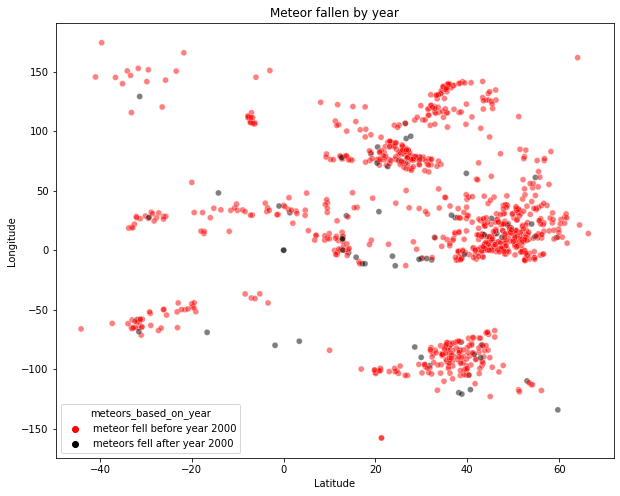

In [113]:
# Set the figure size
plt.figure(figsize=(10, 8))
# create scatter plot
sns.scatterplot(x=latitude, y=longitude, hue=df['meteors_based_on_year'], marker='o', palette=['red', 'black'], alpha=0.5)
#add labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Meteor fallen by year')
#show the plot
plt.show()

* **Meteors with 'red' color dot are the one that fell before year 2000**

**Coordinates of the meteorites that have fallen before 1970**

In [115]:
#Coordinates of meteorites that fell before 1970
df[df["year"]<1970]["point_coordinates"]

0          [6.08333, 50.775]
1       [10.23333, 56.18333]
2           [-113, 54.21667]
4        [-64.95, -33.16667]
5               [71.8, 32.1]
               ...          
994             [35.2, 54.5]
995     [79.41667, 13.63333]
997    [111.53333, -7.08333]
998    [106.58333, -6.66667]
999        [34.76667, 47.85]
Name: point_coordinates, Length: 780, dtype: object

In [119]:
df["meteors_based_on_year"] = ["meteors fell before year 1970" if year<1970 else "meteors fell after year 1970" for year in df["year"]]

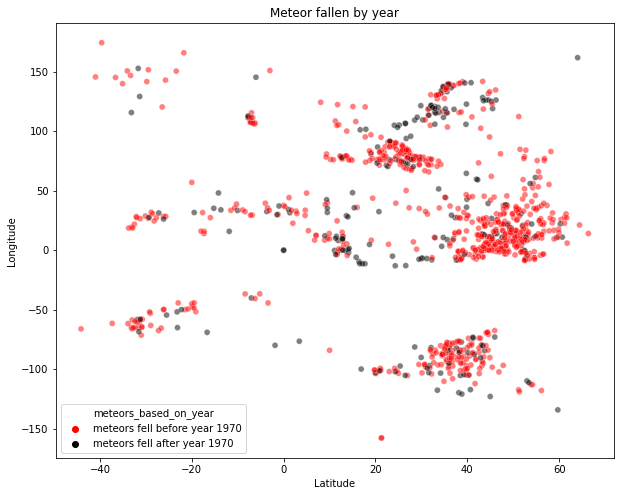

In [120]:
# Set the figure size
plt.figure(figsize=(10, 8))
# create scatter plot
sns.scatterplot(x=latitude, y=longitude, hue=df['meteors_based_on_year'], marker='o', palette=['red', 'black'], alpha=0.5)
#add labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Meteor fallen by year')
#show the plot
plt.show()

* **Meteors with 'red' color dot are the on ethat fell before year 1970**

In [124]:
df.drop(["meteors_based_on_year"], axis = 1, inplace = True)

**Meteorites with mass>10000 Kg**

In [123]:
#Meteorites with mass less than 10000Kg
df[df["mass"]>10000]["name"]

2            Abee
7            Agen
11            Aïr
16        Akyumak
27     Alfianello
          ...    
991     Tieschitz
992        Tilden
994      Timochin
997         Tjabe
998      Tjerebon
Name: name, Length: 243, dtype: object

In [126]:
df["meteors_based_on_mass"] = ["meteors with mass >10000 Kg" if mass<10000 else "meteors with mass <10000 Kg" for mass in df["mass"]]

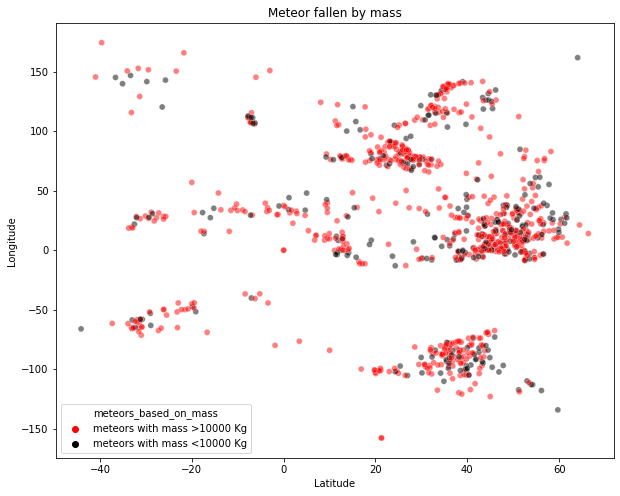

In [128]:
# Set the figure size
plt.figure(figsize=(10, 8))
# create scatter plot
sns.scatterplot(x=latitude, y=longitude, hue=df['meteors_based_on_mass'], marker='o', palette=['red', 'black'], alpha=0.5)
#add labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Meteor fallen by mass')
#show the plot
plt.show()

* **Meteors with 'red' color dot are the one that have mass greater than 10000 Kg**